In [1]:
import food_calorie as FC # food nutrition data 
import img_recog as IR # analyze image and recognize food

from get_APIs import * 

import requests
from fatsecret import Fatsecret

from clarifai_grpc.channel.clarifai_channel import ClarifaiChannel
from clarifai_grpc.grpc.api import resources_pb2, service_pb2, service_pb2_grpc
from clarifai_grpc.grpc.api.status import status_pb2, status_code_pb2

## Main food model

In [22]:
def food_model(file_path, max_concept=5):

    fs, stub, metadata, headers = set_up_api()

    #--------- Analyze concepts -----------
    general_out = IR.General_Image_Analysis2(file_path,stub,metadata)

    if 'food' in general_out:

        output = IR.Food_Image_Analysis(file_path,stub,metadata)

        print('What I see in the picture ')
        for ii in range(max_concept):
            print('%d. %s, %.1f%%'%(ii+1, output[ii]['name'], output[ii]['value']*100))

        #--------- Predict dish -----------
        predict = IR.food_dish_detetion(headers, file_path)
        pred_food_name = predict['name']
        print('---'*10)
        print('Therefore, I predict the dish is')
        print('[ %s ] with prob  %.1f%%'%(pred_food_name, predict['prob']*100))

        if predict['subclasses']:
            print('Possible sub dishes: ')
            for item in predict['subclasses']:
                if item['prob']>0.1:
                    print('  * %s with prob %.1f%%'%(item['name'], item['prob']*100))

        #--------- Get Nutrition Facts -----------
        pred_food_nutritio = FC.find_food_nutrition(fs, pred_food_name)

        print('---'*10)
        print('Here is the nutrition I found for this food: ')

        pred_food_nutritio[0].show_nutrition_facts()

        return(pred_food_name, pred_food_nutritio)
    else :
        print('There seems no food in the image')
        print('Here are the [concepts] what I see:')
        for ii in range(max_concept):
            print('%d. %s  ' %(ii+1, general_out[ii]))
        return
        





## Test

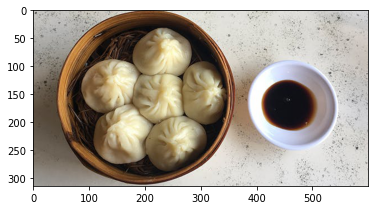

What I see in the picture 
1. dumpling, 99.8%
2. pork, 96.1%
3. dough, 93.1%
4. gyoza, 92.8%
5. meat, 90.6%
------------------------------
Therefore, I predict the dish is
[ dumplings ] with prob  53.6%
Possible sub dishes: 
  * steamed meat dumpling with prob 53.6%
------------------------------
Here is the nutrition I found for this food: 
------------------------------
Food name: Steamed Dumpling (Filled with Meat Poultry or Seafood)
Food id: 4926
1 serving: 37.00 g
Calorie: 41.00 cal, Carbs: 3.54 g, Fat: 0.98 g, Protein: 4.27 g


In [7]:
file_path = 'pics/food1.jpeg'
food_model(file_path, max_concept=5);

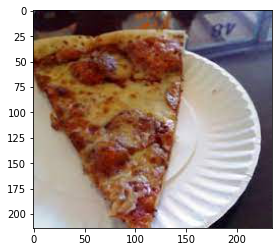

What I see in the picture: 
1  pizza, 1.00
2  pepperoni, 0.93
3  mozzarella, 0.89
4  cheese, 0.88
5  sauce, 0.86
------------------------------
Therefore, I predict the dish is:
[ pizza ] with prob  50.1%
------------------------------
Here is the nutrition I found for this food: 
------------------------------
Food name: Cheese Pizza
Food id: 4881
1 serving: 120.00 g
Calorie: 331.00 cal, Carbs: 36.40 g, Fat: 14.09 g, Protein: 14.80 g


In [12]:
file_path = 'pics/pizza.jpeg'
food_model(file_path,  max_concept=5);

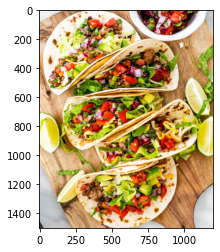

What I see in the picture: 
1. tomato, 99.9
2. vegetable, 99.7
3. lettuce, 99.5
4. pepper, 99.0
5. salad, 98.2
------------------------------
Therefore, I predict the dish is:
[ tacos ] with prob  66.6%
------------------------------
Here is the nutrition I found for this food: 
------------------------------
Food name: Taco or Tostada with Beef, Cheese and Lettuce
Food id: 4823
1 serving: 78.00 g
Calorie: 221.00 cal, Carbs: 16.20 g, Fat: 12.65 g, Protein: 10.88 g


In [14]:
file_path = 'pics/taco.jpeg'
food_model(file_path,  max_concept=5);

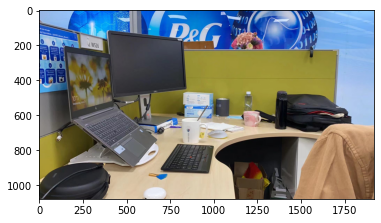

There seems no food in the image
Here is what I sew
1. computer  
2. indoors  
3. contemporary  
4. coffee  
5. desk  


In [20]:
file_path = 'pics/IMG_5288.JPG'
food_model(file_path,  max_concept=5);

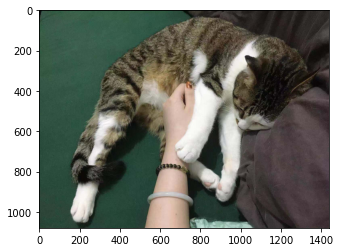

There seems no food in the image
Here are the [concepts] what I see:
1. cat  
2. pet  
3. kitten  
4. cute  
5. mammal  


In [23]:
file_path = 'pics/IMG_5302.JPG'
food_model(file_path,  max_concept=5);